<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/BASIC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
week_data=[1,2,3,4,5]
sales_data=[2,4,5,4,5]
df=pd.DataFrame({'week':week_data,'sales':sales_data})
df

,week,sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [3]:
#Feature
X=df['week'].values
# Target
Y=df['sales'].values

print(f'Feature: {X}')
print(f'Target: {Y}')

Feature: [1 2 3 4 5]
Target: [2 4 5 4 5]


In [4]:
mean_X=np.mean(X)
mean_Y=np.mean(Y)


n=len(X)

numer=0
denom=0

for i in range(n):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2


m=numer/denom
m

c=mean_Y-(m*mean_X)
print(f'Slope: {m}')
print(f'Intercept: {c}')

Slope: 0.6
Intercept: 2.2


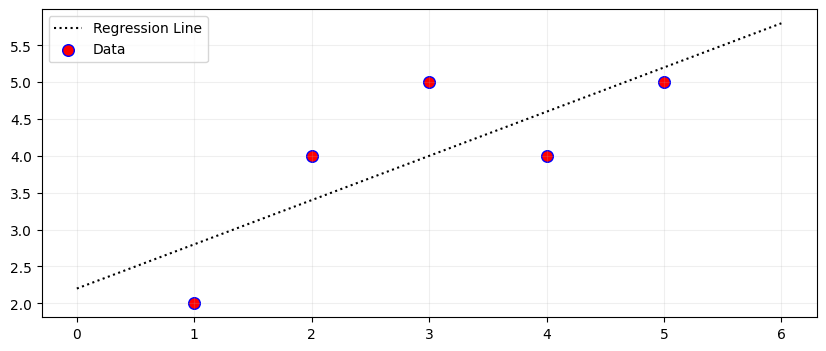

In [5]:
max_X=np.max(X)+1
min_X=np.min(X)-1

x=np.linspace(min_X,max_X)

y=(m*x)+c

plt.figure(figsize=(10,4))
plt.plot(x,y,label='Regression Line',color='black',linestyle=':')
plt.scatter(X,Y,color='red',edgecolors='blue',s=70,label='Data')
plt.legend()
plt.grid(True,alpha=0.2)

In [6]:
ss_tot=0
ss_sse=0
for i in range (n):
  y_pred=(m*X[i]) + c
  ss_tot+=(Y[i]-mean_Y)**2
  ss_sse+=(Y[i]-y_pred)**2

r2=1-(ss_sse/ss_tot)
print(f'R2 Score: {r2}')

R2 Score: 0.6000000000000001


In [7]:
from sklearn.linear_model import LinearRegression
X=X.reshape((n,1))
print(X)
reg=LinearRegression()
reg= reg.fit(X,Y)
reg

[[1]
 [2]
 [3]
 [4]
 [5]]


LinearRegression()

In [8]:
y_pred=(m*X)+c
r2_score=reg.score(X,Y)
print(f'R2 Score: {r2_score}')

R2 Score: 0.6000000000000001


In [9]:
reg.coef_

array([0.6])

In [10]:
reg.intercept_

np.float64(2.2)

In [11]:
data=pd.DataFrame({'Area_house':[1200,3500,5600,4500,2300,4560,2340,3450],
                   'locality':['good','bad','moderate','bad','bad','moderate','good','bad'],
                   'no_bhk':[3,2,4,2,3,4,2,3],
                   'Price_house':[1.2,3.2,4.5,1,2,1,3.2,4]})
data

,Area_house,locality,no_bhk,Price_house
0,1200,good,3,1.2
1,3500,bad,2,3.2
2,5600,moderate,4,4.5
3,4500,bad,2,1.0
4,2300,bad,3,2.0
5,4560,moderate,4,1.0
6,2340,good,2,3.2
7,3450,bad,3,4.0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/headbrain.csv')

In [15]:
df.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [16]:
#Feature
X=df['Head Size(cm^3)'].values
X=X.reshape(-1,1)#-1 means to let the machine decide how many rows we need
X

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [17]:
#Target
Y=df['Brain Weight(grams)'].values
Y


array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)# choose either--> test_sizze or train_size

In [19]:
lr=LinearRegression()
lr=lr.fit(X_train,Y_train)
lr

LinearRegression()

In [20]:
Y_pred=lr.predict(X_test)
Y_pred

array([1351.51901203, 1202.8829979 , 1161.05445587, 1333.8931484 ,
       1224.1918778 , 1276.28025089, 1115.01675238, 1432.80844276,
       1345.46834243, 1156.05607663, 1394.66291701, 1431.7561524 ,
       1281.27863013, 1215.77355488, 1421.75939392, 1245.23768511,
       1147.63775371, 1386.50766668, 1334.41929359, 1265.49427465,
       1333.36700322, 1133.69490637, 1293.90611452, 1376.24783562,
       1259.18053245, 1342.83761651, 1218.66735338, 1212.87975637,
       1303.37672781, 1349.4144313 , 1322.05488179, 1351.78208462,
       1372.56481934, 1156.05607663, 1290.48617083, 1160.00216551,
       1261.28511319, 1323.63331734, 1245.76383029, 1261.81125837,
       1217.35199043, 1420.44403097, 1168.42048843, 1444.64670937,
       1185.52020687, 1179.73260986, 1408.07961917, 1055.29927414])

In [21]:
print("="*50)
mse = mean_squared_error(Y_test,Y_pred)
print(f"mse : {mse:.2f}")
print("="*50)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.2f}")
print(f"On average  your predictions are off by '{rmse:.2f}' grams")
print("="*50)
mae = mean_absolute_error(Y_test,Y_pred)
print(f"mae : {mae:.2f}")
print(f"Your typical overall error in this code is '{mae:.2f}' grams")
print("="*50)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f"mape : {mape:.2f}")
print(f"Your predictions are only '{mape:.2f}'% wrong on average (entire data passed!)")
print("="*50)
r2 = r2_score(Y_test,Y_pred)
print(f"r2 : {r2:.2f}")
print(f"Your model explains {r2*100:.2f}% of the variations in brain weight")
print(f"{r2*100:.2f}% of brainweight bdiff are exp by head size")
print("="*50)

mse : 4330.24
RMSE : 65.80
On average  your predictions are off by '65.80' grams
mae : 50.81
Your typical overall error in this code is '50.81' grams
mape : 0.04
Your predictions are only '0.04'% wrong on average (entire data passed!)
r2 : 0.68
Your model explains 68.46% of the variations in brain weight
68.46% of brainweight bdiff are exp by head size


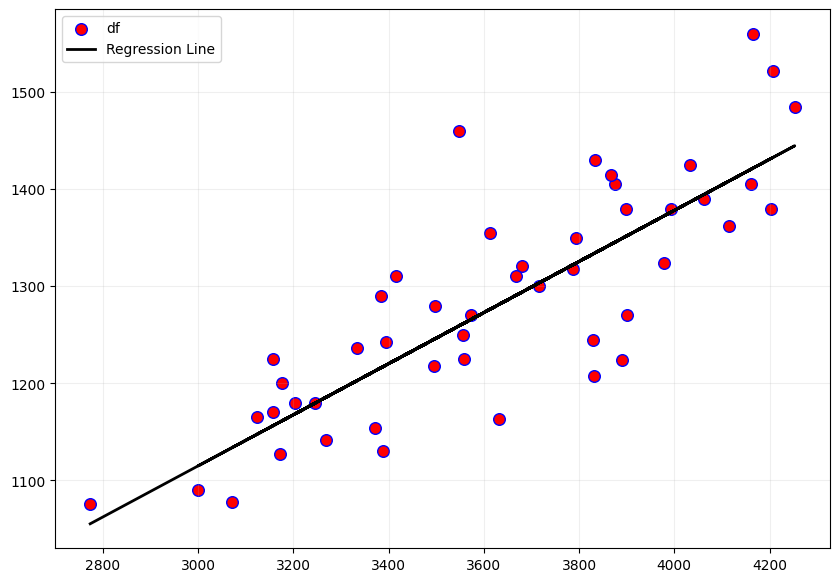

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,Y_test,color='red',edgecolors='blue',s=70,label='df')
plt.plot(X_test,Y_pred,color='black',linestyle='-',linewidth=2,label='Regression Line')
plt.legend()
plt.grid(True,alpha=0.2)

In [23]:
head_size=[[4356.675]]
pred_brain=lr.predict(head_size)
pred_brain

array([1471.92076029])

In [24]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict_buy_or_not_buy(area,price,bhk,m1,m2,m3,c,thresh=0.5):
  y = (m1*area)+(m2*price)+(m3*bhk) + c
  prob = sigmoid(y)

  label = 1 if prob >= thresh else 0
  return prob, label

m1 = 0.001
m2 = -0.000001
m3 = 0.2
c = -1.5

houses = [
    {"area":1200, "price":500000, "bhk":2},
    {"area":1200, "price":300000, "bhk":3}
]

for i, house in enumerate(houses, start=1):
  prob, label = predict_buy_or_not_buy(house['area'],
                                       house['price'],
                                       house['bhk'],
                                       m1,m2,m3,
                                       c)
  print(f"House{i}: Area:{house['area']}, Price : {house['price']}, BHK: {house['bhk']}")
  print(f"Probability of Buying = {prob}")
  print(f"Decision (0=No/1=Yes) = {label}")
  print("="*30)

House1: Area:1200, Price : 500000, BHK: 2
Probability of Buying = 0.401312339887548
Decision (0=No/1=Yes) = 0
House2: Area:1200, Price : 300000, BHK: 3
Probability of Buying = 0.5
Decision (0=No/1=Yes) = 1
